## Task-3: To Explore Unsupervised Machine Learning
## Importing libraries:

In [39]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
import warnings
warnings.filterwarnings('ignore')

## Loading data in DataFrame

In [53]:
df = pd.read_csv("Iris.csv", index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.shape

(150, 5)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### First we need to find the optimum number of clusters for K-Means. Here we will use The Elbow Method to determine the value of k in K-Means.

## The Elbow Method

### In Elbow method we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different values of k, and choose the k for which WCSS becomes first starts to diminish. In the plot of WCSS-versus-k, this is visible as an elbow

In [56]:
x = df.iloc[:, :4].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})


,Number of Clusters,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.561630
5,6,38.930963
6,7,34.190688
7,8,30.063874
8,9,27.842356
9,10,26.048202


## Plotting Number of Clusters vs. WCSS

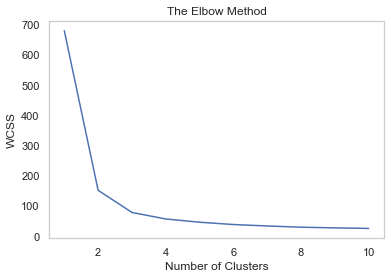

In [57]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

As expected, the plot looks like an arm with a clear elbow at k = 3.


Applying k-means to the dataset with Number of Clusters as k = 3

In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing the clusters on the first two columns

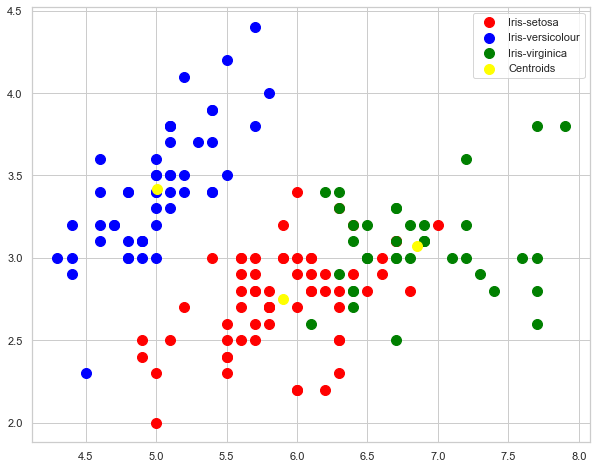

In [59]:
plt.figure(figsize=[10,8])
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], 
            s = 100, c = "red", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

## Visualizing the clusters on the first three columns


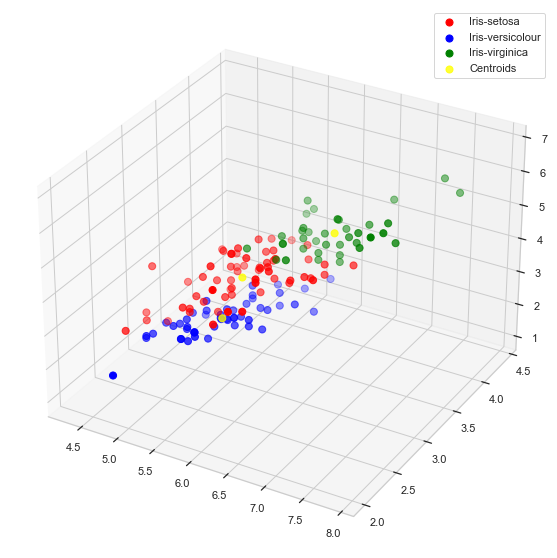

In [60]:

plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
             s = 50, c = "red", label = 'Iris-setosa')
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
             s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], 
             s = 50, c = 'green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s = 50, c = 'yellow', label = 'Centroids', alpha = 0.8)

plt.legend()
plt.show()